decay done, took: 1.6149206161499023 seconds
axion done, took: 0.16763544082641602 seconds


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in true_divide
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:64: RuntimeWarning: invalid value encountered in power
  T = T_const * rho_rad**(1/4)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:65: RuntimeWarning: invalid value encountered in sqrt
  H = H_const * np.sqrt(rho_rad + rho_field)


trans done, took: 1.0843582153320312 seconds
axion decay done, took: 1.5756802558898926 seconds


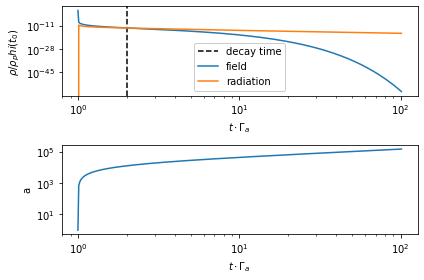

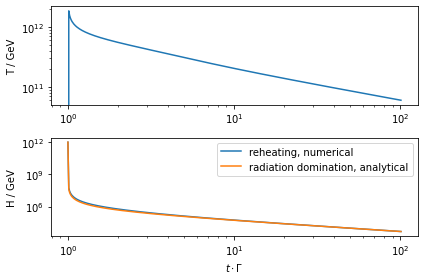

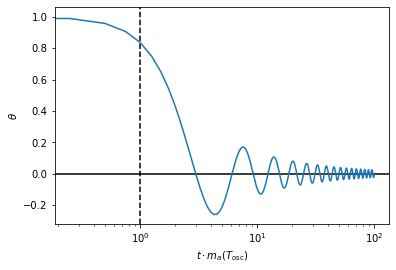

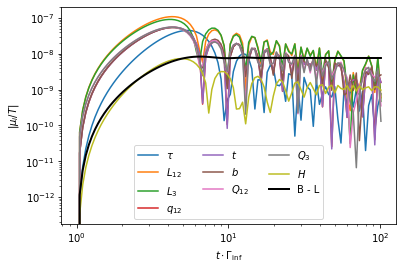

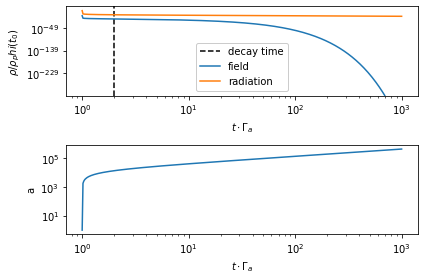

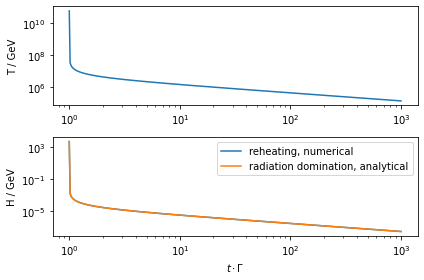

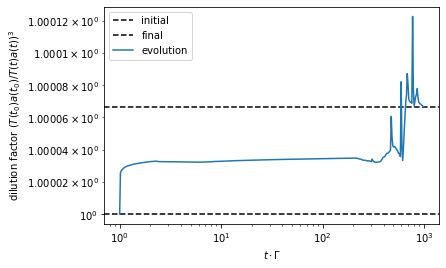

In [5]:
%run test.py
test(1e12, 1e6, 1e6, 1e8, tmax_axion_time=100.0, axion_decay_time=1000.0)

step = 1


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in true_divide
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/test.py:127: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


B-L range: nan nan
delta = nan convergence_rtol = 0.001
step = 2
B-L range: -7.79497175501516e-09 -7.611574880065186e-09
delta = 0.0238289719294782 convergence_rtol = 0.001
step = 3
B-L range: -7.670656472532405e-09 -7.625955971986404e-09
delta = 0.005843449844590413 convergence_rtol = 0.001
step = 4
B-L range: -7.640090679542093e-09 -7.618785708622077e-09
delta = 0.002791791908462455 convergence_rtol = 0.001
step = 5
B-L range: -7.625545954307627e-09 -7.612870779347421e-09
delta = 0.0016632495350160062 convergence_rtol = 0.001
step = 6
B-L range: -7.616663983618806e-09 -7.608163028047453e-09
delta = 0.001116545153149707 convergence_rtol = 0.001
step = 7
B-L range: -7.610512411559918e-09 -7.604365113281356e-09
delta = 0.0008079603676708762 convergence_rtol = 0.001


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)


decay step = 1
delta = 3.3845722777365674e-05 vs 0.001


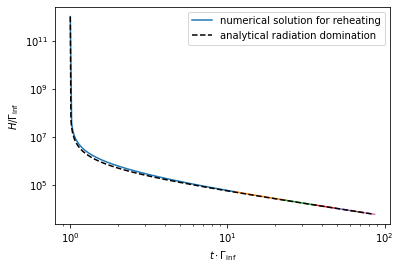

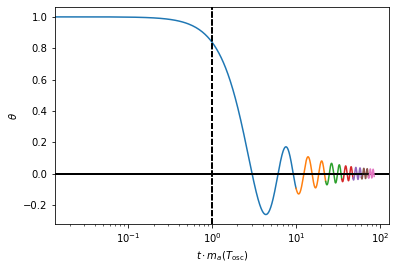

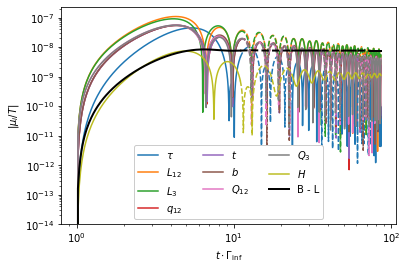

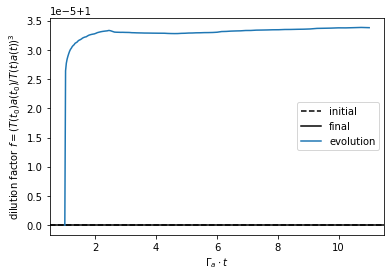

step = 1


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in true_divide
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/test.py:127: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


B-L range: nan nan
delta = nan convergence_rtol = 0.001
step = 2
B-L range: -7.79497175501516e-09 -7.611574880065186e-09
delta = 0.0238289719294782 convergence_rtol = 0.001
step = 3
B-L range: -7.670656472532405e-09 -7.625955971986404e-09
delta = 0.005843449844590413 convergence_rtol = 0.001
step = 4
B-L range: -7.640090679542093e-09 -7.618785708622077e-09
delta = 0.002791791908462455 convergence_rtol = 0.001
step = 5
B-L range: -7.625545954307627e-09 -7.612870779347421e-09
delta = 0.0016632495350160062 convergence_rtol = 0.001
step = 6
B-L range: -7.616663983618806e-09 -7.608163028047453e-09
delta = 0.001116545153149707 convergence_rtol = 0.001
step = 7
B-L range: -7.610512411559918e-09 -7.604365113281356e-09
delta = 0.0008079603676708762 convergence_rtol = 0.001


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)


decay step = 1
delta = 3.3845722777365674e-05 vs 0.001


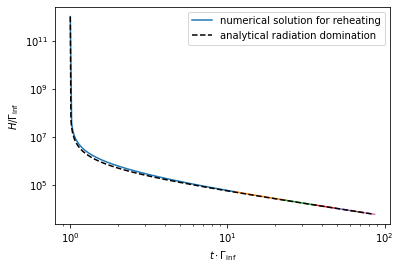

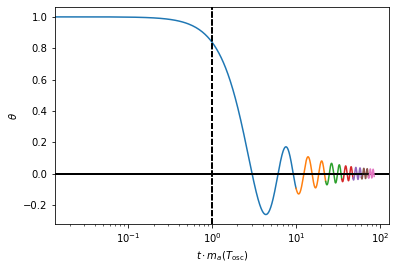

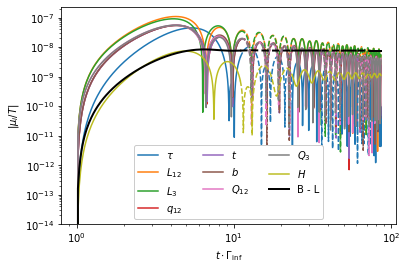

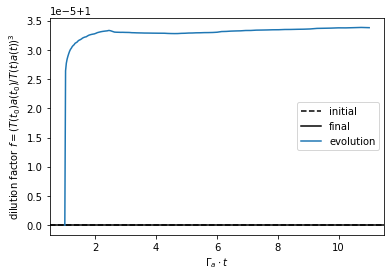

step = 1


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in true_divide
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/test.py:127: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),


B-L range: nan nan
delta = nan convergence_rtol = 0.001
step = 2
B-L range: -7.79497175501516e-09 -7.611574880065186e-09
delta = 0.0238289719294782 convergence_rtol = 0.001
step = 3
B-L range: -7.670656472532405e-09 -7.625955971986404e-09
delta = 0.005843449844590413 convergence_rtol = 0.001
step = 4
B-L range: -7.640090679542093e-09 -7.618785708622077e-09
delta = 0.002791791908462455 convergence_rtol = 0.001
step = 5
B-L range: -7.625545954307627e-09 -7.612870779347421e-09
delta = 0.0016632495350160062 convergence_rtol = 0.001
step = 6
B-L range: -7.616663983618806e-09 -7.608163028047453e-09
delta = 0.001116545153149707 convergence_rtol = 0.001
step = 7


KeyboardInterrupt: 

In [12]:
%run test.py
%timeit compute_asymmetry(1e12, 1e6, 1e6, 1e8, debug=True)